# 01 Datasets
> Collection of toy datasets and single-cell RNA Velocity data for experimentation and testing our directed graph embedder.

In [ ]:
# default_exp datasets
from nbdev.showdoc import *
import numpy as np
%load_ext autoreload
%autoreload 2

This notebook contains examples of each of our datasets. We encourage other researchers to reuse them! Consider this a miniature rival of the wonderful "TADAsets" library from sklearn.

## Toy datasets

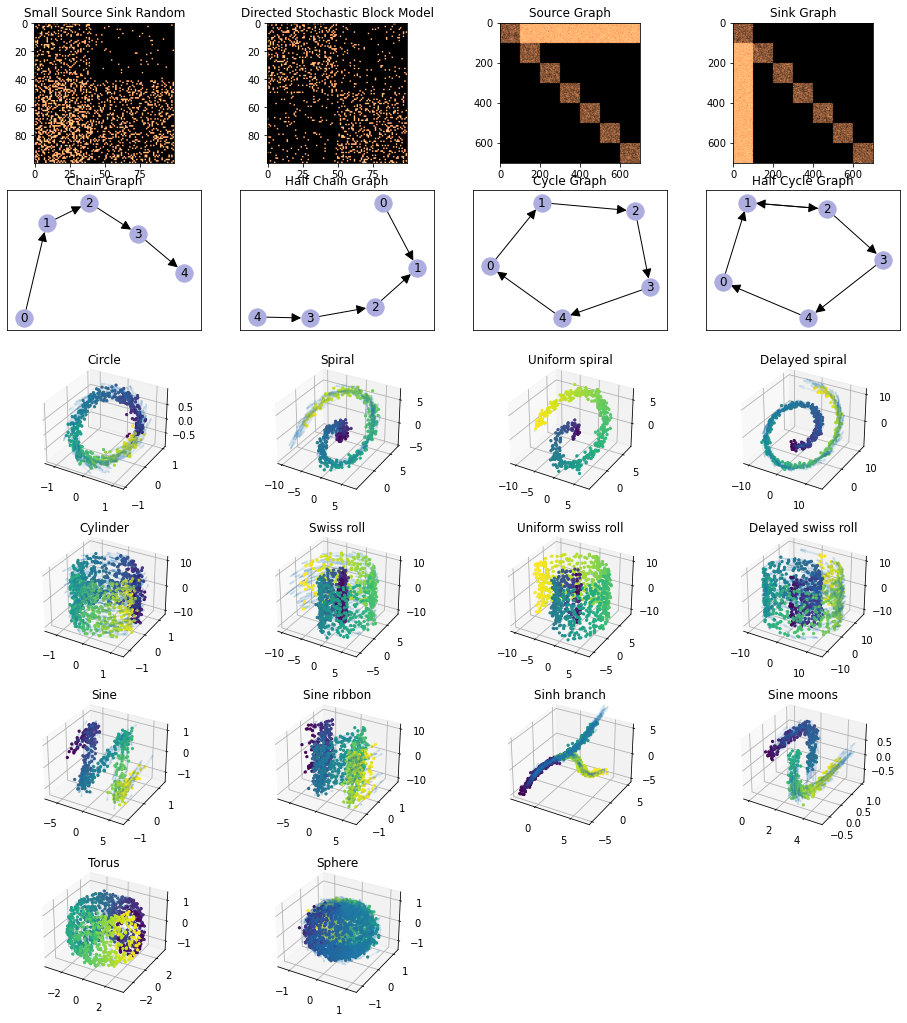

In [ ]:
# hide_input
import torch
import numpy as np

from FRED.graph_datasets import (
    visualize_heatmap, visualize_graph,
    SourceSink, SmallRandom, DirectedStochasticBlockModel, source_graph, sink_graph,
    ChainGraph, HalfChainGraph, CycleGraph, HalfCycleGraph
)
from FRED.datasets import (
    plot_directed_3d, display_galary,
    directed_circle, directed_spiral, directed_spiral_uniform, directed_spiral_delayed,
    directed_cylinder, directed_swiss_roll, directed_swiss_roll_uniform, directed_swiss_roll_delayed,
    directed_sine, directed_sine_ribbon, directed_sinh_branch, directed_sine_moons,
    directed_torus, directed_sphere
)

vizset = [
    (
        "Small Source Sink Random", 
        SmallRandom(num_nodes=100, prob_edge=0.2, 
                        pre_transform=SourceSink(prob_source=0.6, prob_sink=0.4, adv_prob=0.1, remove_prob=0)
                    )[0],
        lambda data, ax: visualize_heatmap(data.edge_index, order_ind=torch.argsort(data.y[:,-1]), ax=ax),
        False
    ),
    (
        "Directed Stochastic Block Model", 
        DirectedStochasticBlockModel(num_nodes=100, num_clusters=2, 
                                        aij=np.array([[0.4, 0.1], [0.1, 0.4]]), 
                                        bij=np.array([[0.5, 0.5], [0.5, 0.5]])
                                    )[0],
        lambda data, ax: visualize_heatmap(data.edge_index, ax=ax),
        False
    ),
    (
        "Source Graph", 
        source_graph()[0],
        lambda data, ax: visualize_heatmap(data.edge_index, ax=ax),
        False
    ),
    (
        "Sink Graph", 
        sink_graph()[0],
        lambda data, ax: visualize_heatmap(data.edge_index, ax=ax),
        False
    ),
    (
        "Chain Graph", 
        ChainGraph(num_nodes=5)[0],
        lambda data, ax: visualize_graph(data, ax=ax),
        False
    ),
    (
        "Half Chain Graph", 
        HalfChainGraph(num_nodes=5, center=1)[0],
        lambda data, ax: visualize_graph(data, ax=ax),
        False
    ),
    (
        "Cycle Graph", 
        CycleGraph(num_nodes=5)[0],
        lambda data, ax: visualize_graph(data, ax=ax),
        False
    ),
    (
        "Half Cycle Graph", 
        HalfCycleGraph(num_nodes=5, center=1)[0],
        lambda data, ax: visualize_graph(data, ax=ax),
        False
    ),
    (
        "Circle", 
        directed_circle(xtilt=np.pi/4, sigma=0.1),
        lambda data, ax: plot_directed_3d(data[0], data[1], data[2], mask_prob=0.5, ax=ax), 
        True
    ),
    (
        "Spiral", 
        directed_spiral(xtilt=np.pi/4, sigma=0.5),
        lambda data, ax: plot_directed_3d(data[0], data[1], data[2], mask_prob=0.5, ax=ax), 
        True      
    ),
    (
        "Uniform spiral", 
        directed_spiral_uniform(xtilt=np.pi/4, sigma=0.5),
        lambda data, ax: plot_directed_3d(data[0], data[1], data[2], mask_prob=0.5, ax=ax), 
        True
    ),
    (
        "Delayed spiral", 
        directed_spiral_delayed(xtilt=np.pi/4, sigma=0.5),
        lambda data, ax: plot_directed_3d(data[0], data[1], data[2], mask_prob=0.5, ax=ax), 
        True
    ),
    (
        "Cylinder", 
        directed_cylinder(sigma=0.1),
        lambda data, ax: plot_directed_3d(data[0], data[1], data[2], mask_prob=0.5, ax=ax), 
        True
    ),
    (
        "Swiss roll", 
        directed_swiss_roll(sigma=0.3),
        lambda data, ax: plot_directed_3d(data[0], data[1], data[2], mask_prob=0.5, ax=ax), 
        True
    ),
    (
        "Uniform swiss roll", 
        directed_swiss_roll_uniform(sigma=0.3),
        lambda data, ax: plot_directed_3d(data[0], data[1], data[2], mask_prob=0.5, ax=ax), 
        True
    ),
    (
        "Delayed swiss roll", 
        directed_swiss_roll_delayed(sigma=0.3),
        lambda data, ax: plot_directed_3d(data[0], data[1], data[2], mask_prob=0.5, ax=ax), 
        True
    ),
    (
        "Sine", 
        directed_sine(xtilt=np.pi/4, sigma=0.2),
        lambda data, ax: plot_directed_3d(data[0], data[1], data[2], mask_prob=0.5, ax=ax), 
        True
    ),
    (
        "Sine ribbon", 
        directed_sine_ribbon(sigma=0.2),
        lambda data, ax: plot_directed_3d(data[0], data[1], data[2], mask_prob=0.5, ax=ax), 
        True
    ),
    (
        "Sinh branch", 
        directed_sinh_branch(xtilt=np.pi/4, sigma=0.2),
        lambda data, ax: plot_directed_3d(data[0], data[1], data[2], mask_prob=0.5, ax=ax), 
        True
    ),
    (
        "Sine moons",
        directed_sine_moons(xtilt=np.pi/4, sigma=0.1),
        lambda data, ax: plot_directed_3d(data[0], data[1], data[2], mask_prob=0.5, ax=ax), 
        True
    ),
    (
        "Torus", 
        directed_torus(noise=0.1),
        lambda data, ax: plot_directed_3d(data[0], data[1], data[2], mask_prob=0.5, ax=ax), 
        True
    ),
    (
        "Sphere", 
        directed_sphere(noise=0.1),
        lambda data, ax: plot_directed_3d(data[0], data[1], data[2], mask_prob=0.5, ax=ax), 
        True
    )
]
display_galary(vizset)

## Single-cell datasets

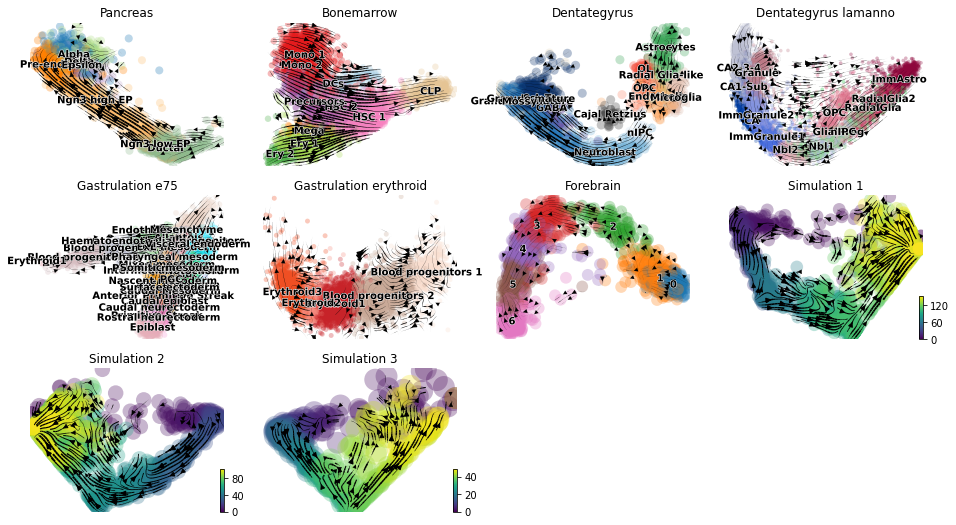

In [ ]:
# hide_input
from FRED.datasets import rnavelo_plot_pca, display_galary

import tqdm
def nop(*a, **k):
    return None
tqdm.notebook.tqdm = nop

import scvelo as scv
scv.settings.verbosity = 0

vizset = [
    (
        "Pancreas", 
        scv.datasets.pancreas(),
        lambda adata, ax: rnavelo_plot_pca(adata, ax=ax, show=False),
        False
    ),
    (
        "Bonemarrow", 
        scv.datasets.bonemarrow(),
        lambda adata, ax: rnavelo_plot_pca(adata, ax=ax, show=False),
        False
    ),
    (
        "Dentategyrus", 
        scv.datasets.dentategyrus(),
        lambda adata, ax: rnavelo_plot_pca(adata, ax=ax, show=False),
        False
    ),
    (
        "Dentategyrus lamanno", 
        scv.datasets.dentategyrus_lamanno(),
        lambda adata, ax: rnavelo_plot_pca(adata, ax=ax, show=False),
        False
    ),
    (
        "Gastrulation e75", 
        scv.datasets.gastrulation_e75(),
        lambda adata, ax: rnavelo_plot_pca(adata, ax=ax, show=False),
        False
    ),
    (
        "Gastrulation erythroid", 
        scv.datasets.gastrulation_erythroid(),
        lambda adata, ax: rnavelo_plot_pca(adata, ax=ax, show=False),
        False
    ),
    (
        "Forebrain", 
        scv.datasets.forebrain(),
        lambda adata, ax: rnavelo_plot_pca(adata, ax=ax, show=False),
        False
    ),
    (
        "Simulation 1", 
        scv.datasets.simulation(n_obs=1500),
        lambda adata, ax: rnavelo_plot_pca(adata, ax=ax, show=False),
        False
    ),
    (
        "Simulation 2", 
        scv.datasets.simulation(n_obs=1000, switches=[0.2, 0.3, 0.5, 1]),
        lambda adata, ax: rnavelo_plot_pca(adata, ax=ax, show=False),
        False
    ),
    (
        "Simulation 3", 
        scv.datasets.simulation(n_obs=500, switches=[0.8, 0.3, 0.7]),
        lambda adata, ax: rnavelo_plot_pca(adata, ax=ax, show=False),
        False
    )
]
display_galary(vizset)